In [1]:

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})
import folium
import re
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

class DataFrame(object):

    def __init__(self,file_path):
        """Create df object
        Parameters
        ----------
        file_path: takes in a file path to raw data
        """
        self.file_path = file_path
        
    def clean(self):
        '''
        Parameters
            self: self
        Returns
            a cleaned df
        '''
        df = pd.read_csv(self.file_path,encoding='latin1')
        df.dropna(inplace=True)
        df.drop(['permalink','region','founded_month','founded_quarter'],axis=1,inplace=True)
        df['founded_at'] = pd.to_datetime(df['founded_at'],errors='coerce')
        df['first_funding_at']= pd.to_datetime(df['first_funding_at'],errors='coerce')
        df['last_funding_at']= pd.to_datetime(df['first_funding_at'],errors='coerce')
        df['founded_year'] = df['founded_year'].astype('int64')
        df.drop(df[df['country_code']=='CAN'].index,inplace=True)
        df['funding_total_usd'] = df[' funding_total_usd '].apply(lambda x: x.replace(' ',''))\
            .apply(lambda x: x.replace(',',''))
        df['funding_total_usd'] = df['funding_total_usd'].apply(lambda x: x.replace('-','0'))
        df['funding_total_usd'] = df['funding_total_usd'].astype('int64')
        df['market'] = df[' market '].apply(lambda x: x.replace(' ',''))
        df.drop([' market ',' funding_total_usd ','country_code','homepage_url','name','city','last_funding_at', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H','category_list'],axis=1,inplace=True)
        return df

def feature_engineer(df):
    '''
    Parameters
        df: Takes in a pandas data frame
    Returns
        a data frame with engineered features
    '''
    df['time_to_funding'] = abs((df['first_funding_at']-df['founded_at']).dt.days)
    test_list = list(df['market'].value_counts()\
        .rename_axis('market').reset_index(name='counts')[:20]['market'])
    df.loc[~df["market"].isin(test_list), "market"] = "Other"
    df.dropna(inplace=True)
    return df

def create_pie_charts(df,column,column_val,target):
    '''
    Parameters
    df: Cleaned data frame
    column: column of data frame used to split data as string
    column_val: Value we are looking for in column as string
    target: The target values we are trying to predict
    Returns
    a saved image in the images folder
    '''
    column_val_title = ' '.join(re.findall('[A-Z][^A-Z]*',column_val))
    pie_df = df[df[column]==column_val][target].value_counts().rename_axis(target)\
        .reset_index(name='counts')
    pie_df['pct'] = pie_df['counts']/len(pie_df)
    labels=pie_df[target]
    fig, ax = plt.subplots(figsize=(14,7))
    ax.pie(pie_df['pct'], explode=[0,.2,0], labels=labels, \
        autopct='%1.1f%%',shadow=False, startangle=50)
    ax.axis('equal')
    ax.set_title(f'{target.capitalize()} Of {column_val_title} Market',fontweight='bold')
    plt.savefig(f'../images/{column_val}_pie.png',dpi=500)
    plt.close(fig='all')


if __name__ == '__main__':

    #intialized dataframe class and build features
    intial_df = DataFrame('../../../Downloads/investments_VC.csv').clean()
    clean_feat_df=feature_engineer(intial_df)

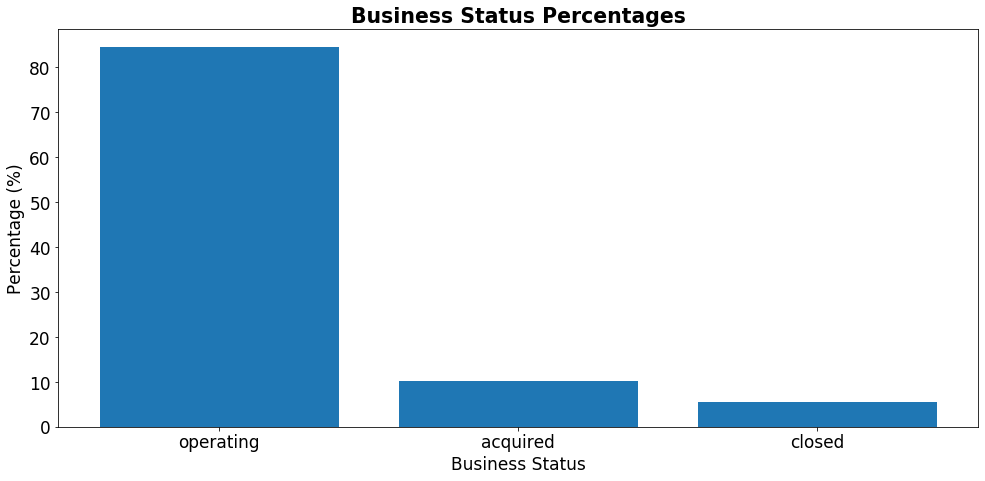

In [13]:
status_df = clean_feat_df['status'].value_counts().rename_axis('status').reset_index(name='counts')
status_df ['pct'] = round((status_df['counts']/status_df['counts'].sum())*100,2)
status_df
labels=status_df['status']
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(status_df['status'],status_df['pct'])
ax.set_xlabel('Business Status')
ax.set_ylabel('Percentage (%)')
ax.set_title('Business Status Percentages',fontweight='bold')
plt.tight_layout()
plt.savefig('../images/business_status.png')

<BarContainer object of 4 artists>

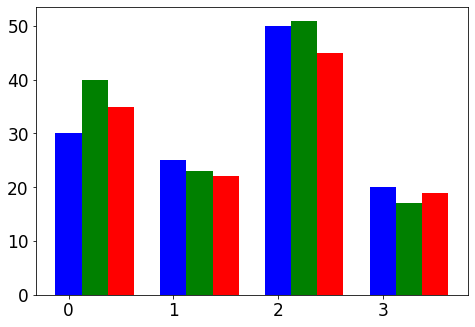

In [14]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [16]:
X

array([0, 1, 2, 3])